In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.sparse.linalg as ll
import pandas as pd

# 2. PCA: Food Consumption in European Countries

## 2.1

In [ ]:
dat = pd.read_csv("data/food-consumption.csv")

atr = dat.iloc[:,1:21]
country = dat.iloc[:,0]
m,n = atr.shape
atr

In [ ]:
mu = np.array(np.mean(atr,axis = 1))
xc = atr - mu[:,None]
print(np.shape(xc))
C = np.dot(xc,xc.T)/m
print(m)
K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st S
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue


sorted_indices = np.argsort(S)[::-1]
S = S[sorted_indices]
W = W[:, sorted_indices]


In [ ]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(W[:, 0], W[:, 1])

# Label points with country names
for i, country1 in enumerate(country):
    plt.annotate(country1, (W[i, 0], W[i, 1]))

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Food Consumption Data')

# Show the plot
plt.show()

## 2.2

In [ ]:
dat = pd.read_csv("data/food-consumption.csv")
dat = dat.T.reset_index()
country = dat.iloc[1:,1:21]
country = country.astype(float)
dat.columns = dat.iloc[0]
dat = dat[1:]
food = dat.iloc[:,0]
#country = country.to_numpy()
m,n = country.shape
food[1]

In [ ]:
mu = np.array(np.mean(country,axis = 1))

xc = country - mu[:,None]
xc = np.array(xc, dtype=object)

C = np.dot(xc,xc.T)/m
C = C.astype(float)



In [ ]:
K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st S
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue


sorted_indices = np.argsort(S)[::-1]
S = S[sorted_indices]
W = W[:, sorted_indices]

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(W[:, 0], W[:, 1])

# Label points with country names
for i, country1 in enumerate(food):
    plt.annotate(country1, (W[i, 0], W[i, 1]))

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Food Consumption Data')

# Show the plot
plt.show()

# 3. Order of faces using ISOMAP

In [2]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.sparse.csgraph import shortest_path
from scipy import linalg
import networkx as nx

data1 = loadmat('data/isomap.mat')
im = data1['images'].reshape(64,64,698).T
data = data1['images']


In [5]:
np.shape(data.T)

(698, 4096)

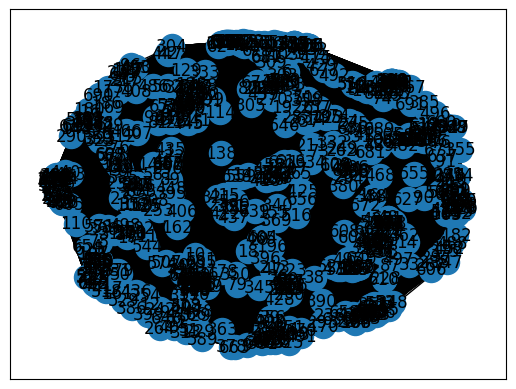

In [7]:
# https://www.askpython.com/python/examples/adjacency-matrix-python 

n= 698
k = 2
eps = 12
d = data.T
euclidean_distances = np.ones((n, n)) * np.inf
adjacency_matrix = np.zeros((n, n))
a = np.zeros((n, n))
di = np.zeros((n, n)) 
for i in range(n):
    for j in range(n):
        if i != j:
            dist = np.sqrt(np.sum((d[i] - d[j]) ** 2))
            if dist <= eps:
                adjacency_matrix[i,j] = dist
            else:
                adjacency_matrix[i,j] = np.inf
            a[i,j] = 1

def createGraph(adjM):
  edges=[]
  noofvertices=len(adjM)
  for mat in adjM:
    if len(mat)>noofvertices or len(mat)<noofvertices:
      print("False Adjacency Matrix")
      return 0
  for i in range(len(adjM)):
    mat=adjM[i]
    for j in range(len(mat)):
      if mat[j]==1:
        temp=[i,j]
        edges.append(temp)
  G=nx.Graph()
  G.add_edges_from(edges)
  nx.draw_networkx(G)
  plt.show()
  vertices=[i for i in range(len(adjM))]
  #return vertices,edges
  return


createGraph(a)

In [3]:
# https://github.com/lwileczek/isomap/blob/master/README.md


# Make A and D matrix
eps = 12
n, m = data.shape
dist = cdist(data.T, data.T, metric="euclidean")
adj =  np.zeros((m, m)) + np.inf
rng = dist < eps
adj[rng] = dist[rng]
d = shortest_path(adj).real

# centering matrix H to get C
n, m = d.shape
h = np.eye(m) - (1/m)*np.ones((m, m))
d = d**2
c = -1/(2) * h.dot(d).dot(h)


# compute leading eignvecs and eignevals
evals, evecs = linalg.eig(c)
idx = evals.argsort()[::-1]
evals = evals[idx]
evecs = evecs[:, idx]
evals = evals[:2] 
evecs = evecs[:, :2]
z = -evecs.dot(np.diag(evals**(-1/2)))
z = z.real

In [4]:
np.shape(z)

(698, 2)

Text(0.5, 0, 'Right-Left Pose')

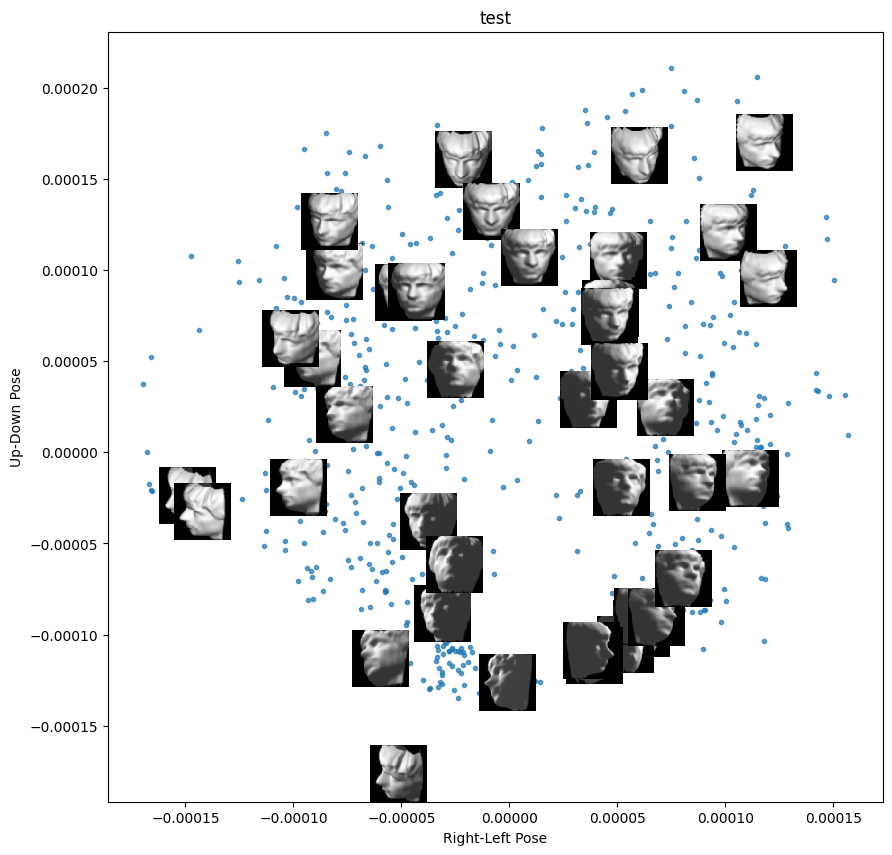

In [6]:
components = z
x_ = data.T
n, m = x_.shape
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('test')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')
# Show 40 of the images ont the plot
x_size = (max(components[:, 0]) - min(components[:, 0])) * 0.08
y_size = (max(components[:, 1]) - min(components[:, 1])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, n)
    x0 = components[img_num, 0] - (x_size / 2.)
    y0 = components[img_num, 1] - (y_size / 2.)
    x1 = components[img_num, 0] + (x_size / 2.)
    y1 = components[img_num, 1] + (y_size / 2.)
    img = x_[img_num,:].reshape(64, 64).T
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))
# Show 2D components plot
ax.scatter(components[:, 0], components[:, 1], marker='.',alpha=0.7)
ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

In [13]:
mu = np.array(np.mean(data.T,axis = 1))

xc = data.T - mu[:,None]
xc = np.array(xc, dtype=object)
m = 698
C = np.dot(xc,xc.T)/m
C = C.astype(float)




K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st S
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue


sorted_indices = np.argsort(S)[::-1]
S = S[sorted_indices]
W = -W[:, sorted_indices]

Text(0.5, 0, 'Right-Left Pose')

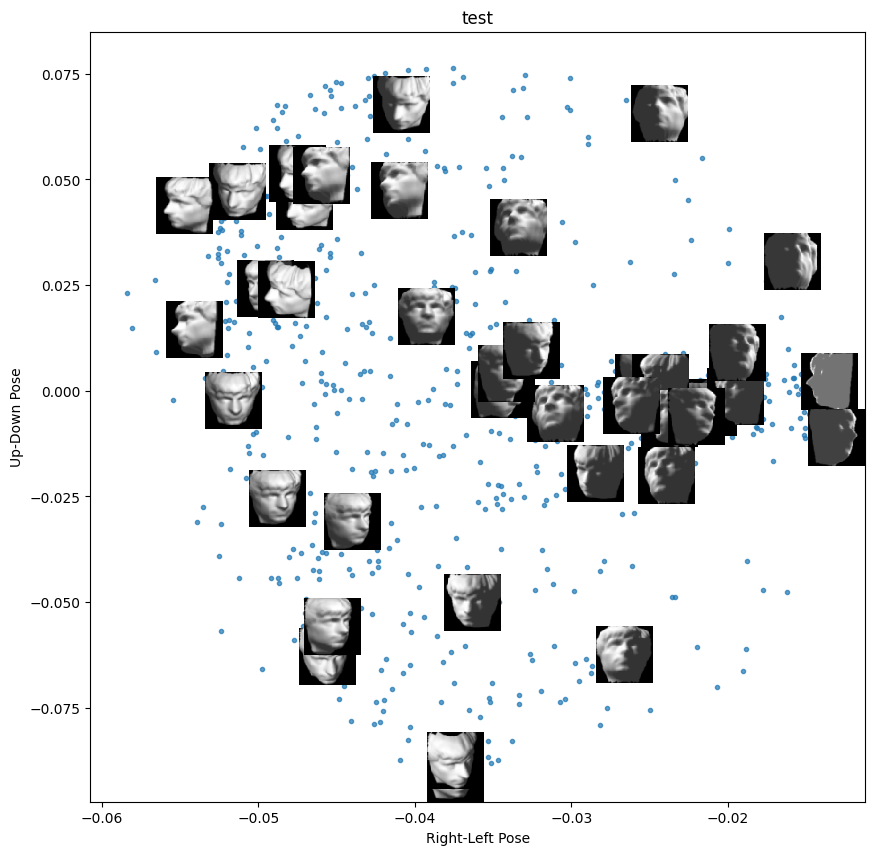

In [20]:
# Create a scatter plot
#plt.figure(figsize=(10, 6))
#plt.scatter(W[:, 0], W[:, 1])

components = -W
x_ = data.T
n, m = x_.shape
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('test')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')
# Show 40 of the images ont the plot
x_size = (max(components[:, 0]) - min(components[:, 0])) * 0.08
y_size = (max(components[:, 1]) - min(components[:, 1])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, n)
    x0 = components[img_num, 0] - (x_size / 2.)
    y0 = components[img_num, 1] - (y_size / 2.)
    x1 = components[img_num, 0] + (x_size / 2.)
    y1 = components[img_num, 1] + (y_size / 2.)
    img = x_[img_num,:].reshape(64, 64).T
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))
# Show 2D components plot
ax.scatter(components[:, 0], components[:, 1], marker='.',alpha=0.7)
ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

# 4. Eigenfaces and simple face recognition

In [21]:
import glob
from PIL import Image
from scipy import ndimage
from sklearn.decomposition import PCA

# pull images 
images1 = [Image.open(file) for file in glob.glob("data/yalefaces/s1/*.gif")]
images2 = [Image.open(file) for file in glob.glob("data/yalefaces/s2/*.gif")]

# downsampling by factor of 4
im_og = np.empty([10, 243, 320])
s1 = np.empty([10,61,80])
for i in range(len(images1)):
    im_og[i] = np.array(images1[i])
    s1[i] = ndimage.interpolation.zoom(im_og[i],.25)

im_og = np.empty([9, 243, 320])
s2 = np.empty([9,61,80])
for i in range(len(images2)):
    im_og[i] = np.array(images2[i])
    s2[i] = ndimage.interpolation.zoom(im_og[i],.25)

# convert to data matrix (each row is vectorized image)
S1 = []
for i in range(len(s1)):
    s = s1[i].reshape(-1,4880) 
    S1.append(s)
    
S2 = []
for i in range(len(s2)):
    s = s2[i].reshape(-1,4880) 
    S2.append(s)

S1 =np.squeeze(S1)
S2 =np.squeeze(S2)


/var/folders/1p/cp6mx14s7fbcxp3s3vtxppl00000gn/T/ipykernel_2523/807143877.py:15: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  s1[i] = ndimage.interpolation.zoom(im_og[i],.25)
/var/folders/1p/cp6mx14s7fbcxp3s3vtxppl00000gn/T/ipykernel_2523/807143877.py:21: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  s2[i] = ndimage.interpolation.zoom(im_og[i],.25)


In [64]:
from sklearn.decomposition import PCA
# Perform PCA to get top 1 eignfaces
pca1 = PCA(n_components=1)
pca1.fit(S1)
ef1 = pca1.components_
ef1i = ef1.reshape(1,61,80)

pca2 = PCA(n_components=1)
pca2.fit(S2)
ef2 = pca2.components_
ef2i = ef2.reshape(1,61,80)


In [60]:
from sklearn.decomposition import PCA
# Perform PCA to get top 1 eignfaces
pca1 = PCA(n_components=6)
pca1.fit(S1)
ef1 = pca1.components_
ef1i = ef1.reshape(6,61,80)

pca2 = PCA(n_components=6)
pca2.fit(S2)
ef2 = pca2.components_
ef2i = ef2.reshape(6,61,80)


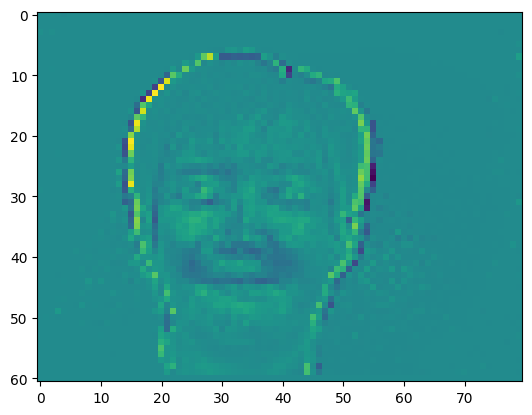

In [63]:
plt.imshow(ef2i[5].reshape(61,80))

In [58]:
# pull images 
test1 = [Image.open(file) for file in glob.glob("data/yalefaces/test/subject01-test.gif")]
test2 = [Image.open(file) for file in glob.glob("data/yalefaces/test/subject02-test.gif")]

# downsampling by factor of 4
im_og = np.empty([1, 243, 320])
s1 = np.empty([1,61,80])
for i in range(len(test1)):
    im_og[i] = np.array(test1[i])
    s1[i] = ndimage.interpolation.zoom(im_og[i],.25)

im_og = np.empty([1, 243, 320])
s2 = np.empty([1,61,80])
for i in range(len(test2)):
    im_og[i] = np.array(test2[i])
    s2[i] = ndimage.interpolation.zoom(im_og[i],.25)

# convert to data matrix (each row is vectorized image)
t1 = []
for i in range(len(s1)):
    s = s1[i].reshape(-1,4880) 
    t1.append(s)
    
t2 = []
for i in range(len(s2)):
    s = s2[i].reshape(-1,4880) 
    t2.append(s)

t1 = t1[0]
t2 = t2[0]


/var/folders/1p/cp6mx14s7fbcxp3s3vtxppl00000gn/T/ipykernel_2523/3788355382.py:10: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  s1[i] = ndimage.interpolation.zoom(im_og[i],.25)
/var/folders/1p/cp6mx14s7fbcxp3s3vtxppl00000gn/T/ipykernel_2523/3788355382.py:16: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  s2[i] = ndimage.interpolation.zoom(im_og[i],.25)


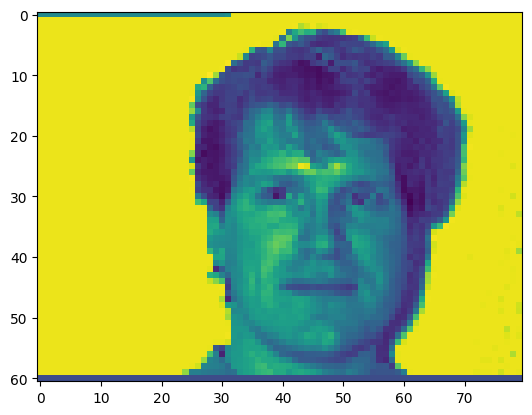

In [59]:
plt.imshow(t1.reshape(61,80))

In [65]:
ef11 = ef1[0].reshape(4880,1)
ef22 = ef2[0].reshape(4880,1)

pr11 = np.linalg.norm(t1 - np.dot(ef1,np.dot(ef1.T,t1)))
pr21 = np.linalg.norm(t1 - np.dot(ef2,np.dot(ef2.T,t1)))
pr12 = np.linalg.norm(t2 - np.dot(ef1,np.dot(ef1.T,t2)))
pr22 = np.linalg.norm(t2 - np.dot(ef2,np.dot(ef2.T,t2)))

print("Projection Residual:", pr11)
print("Projection Residual:", pr21)
print("Projection Residual:", pr12)
print("Projection Residual:", pr22)



Projection Residual: 1.140491935449733e-11
Projection Residual: 1.6305146820027496e-11
Projection Residual: 9.766697934810593e-12
Projection Residual: 1.7549962377434682e-11


In [73]:
pr11 = np.linalg.norm(t1 - np.dot(ef1[0], ef1[0].T)*t1)
pr12 = np.linalg.norm(t1 - np.dot(ef2, ef2.T)*t1)
pr21 = np.linalg.norm(t2 - np.dot(ef1, ef1.T)*t2)
pr22 = np.linalg.norm(t2 - np.dot(ef2, ef2.T)*t2)

print("Projection Residual:", pr11)
print("Projection Residual:", pr12)
print("Projection Residual:", pr21)
print("Projection Residual:", pr22)

Projection Residual: 2.471076556454931e-22
Projection Residual: 6.2805509579893745e-12
Projection Residual: 1.6324617851119282e-11
Projection Residual: 6.5276193033210805e-12


In [72]:
print(np.dot(ef2[0].T, ef22))

[1.]
